In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip "/content/gdrive/MyDrive/archive.zip" -d "/content/dataset/"

Archive:  /content/gdrive/MyDrive/archive.zip
  inflating: /content/dataset/drawings/spiral/testing/healthy/V01HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V02HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V03HE1.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V04HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V05HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V06HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V07HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V08HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V09HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V10HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V11HE01.png  
  inflating: /content/dataset/drawings/spiral/testing/healthy/V55HE12.png  
  inflating: /content/dataset/drawings/spir

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai import * # import the FastAI v3 lib which includes pytorch
from fastai.vision import  * # import all of the computer vision related libs from vision 

# lets import our necessary magic libs
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
BATCH_SIZE = 64 
IMG_SIZE = 224
WORKERS = 0 
DATA_PATH_STR = '/content/dataset/'
DATA_PATH_OBJ = Path(DATA_PATH_STR)

In [5]:
tfms = get_transforms() # standard data augmentation ()

data = (ImageList.from_folder(DATA_PATH_OBJ)        # get data from path object
        .split_by_rand_pct()                        # separate 20% of data for validation set
        .label_from_folder()                          # label based on directory
        .transform(tfms, size=IMG_SIZE)                   # added image data augmentation
        .databunch(bs=BATCH_SIZE, num_workers=WORKERS)    # create ImageDataBunch
        .normalize(imagenet_stats))                   # normalize RGB vals using imagenet stats

In [6]:
# lets check to see if the seperations were done correctls
('training DS size:', len(data.train_ds), 'validation DS size:' ,len(data.valid_ds))

('training DS size:', 327, 'validation DS size:', 81)

In [7]:
# lets check our labels/classes
data.classes

['healthy', 'parkinson']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

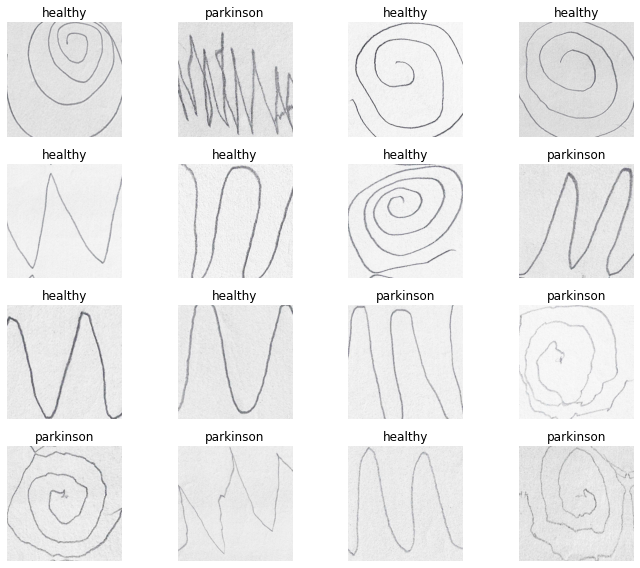

In [8]:
data.show_batch(rows=4, figsize=(10,8))

In [9]:
learn = cnn_learner(data, models.alexnet, metrics=accuracy, model_dir='/tmp/models')

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [10]:
# lets start training via one cycle 
learn.fit_one_cycle(1)
# should happen quickly since the dataset is relatively small

epoch,train_loss,valid_loss,accuracy,time
0,1.015146,0.731210,0.654321,00:05


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

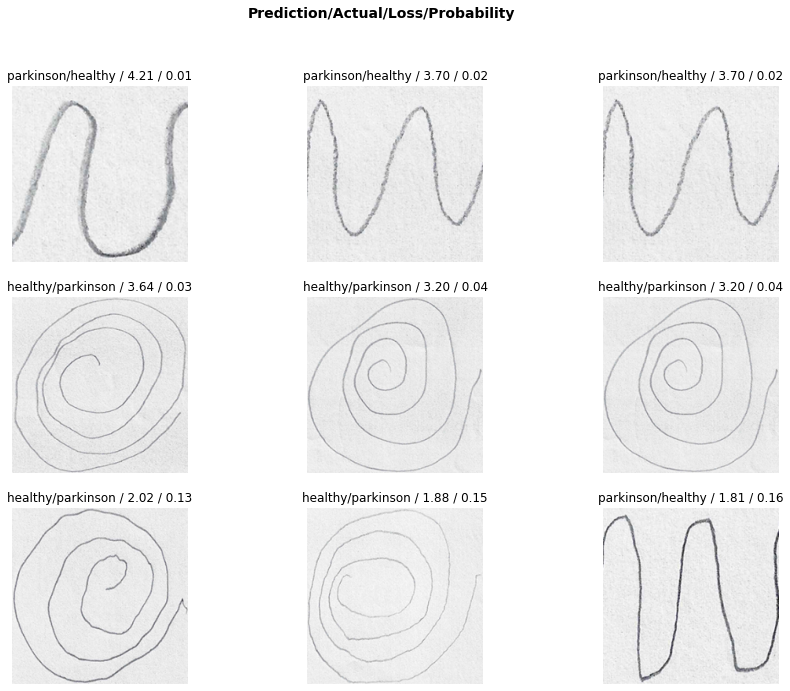

In [12]:
# show me what the model was most confident in yet, was incorrect.
losses,idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11))

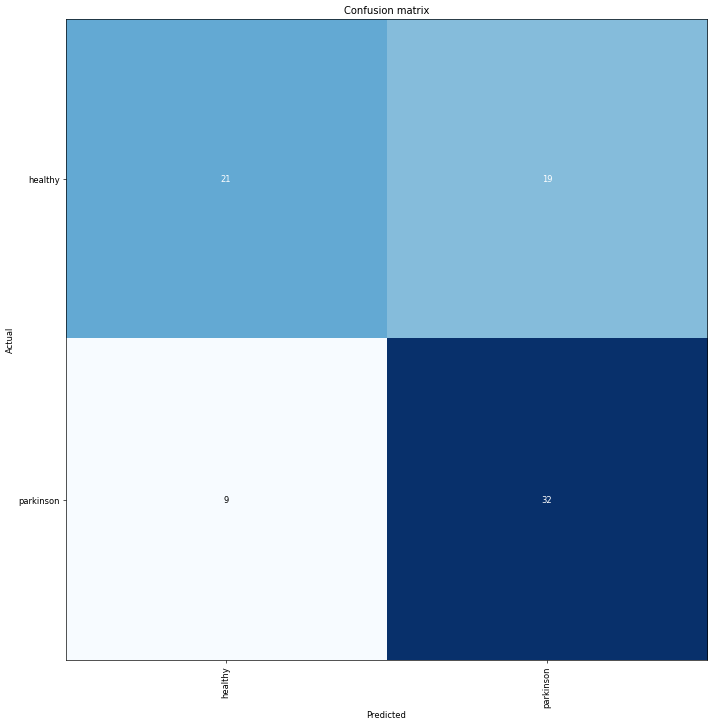

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
# lets unfreeze the remainder of the model to see if our model can do better 
learn.unfreeze()

In [15]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.831806,0.536525,0.691358,00:05
1,0.831268,0.401600,0.802469,00:05
2,0.794635,0.321770,0.876543,00:05


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.02E-06


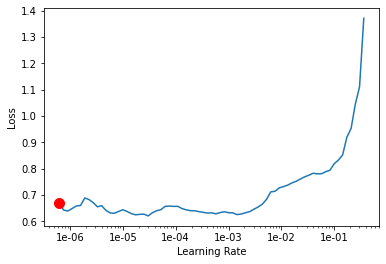

In [16]:
# lets try to find the learning rate to improve the model accuracy
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [17]:
# instead of the default max_lr
# lets pass our cycle the lowest learning rates suggested
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.727861,0.293427,0.876543,00:05
1,0.669292,0.278886,0.864198,00:05
2,0.656154,0.270474,0.864198,00:05
3,0.622045,0.311490,0.851852,00:05
4,0.631680,0.434577,0.814815,00:05
5,0.660430,0.449977,0.814815,00:05
6,0.648760,0.396042,0.827160,00:05
7,0.624514,0.348254,0.814815,00:05
8,0.609081,0.314070,0.827160,00:05
9,0.604582,0.308977,0.802469,00:05


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [18]:
learn.save('stage-2-86')

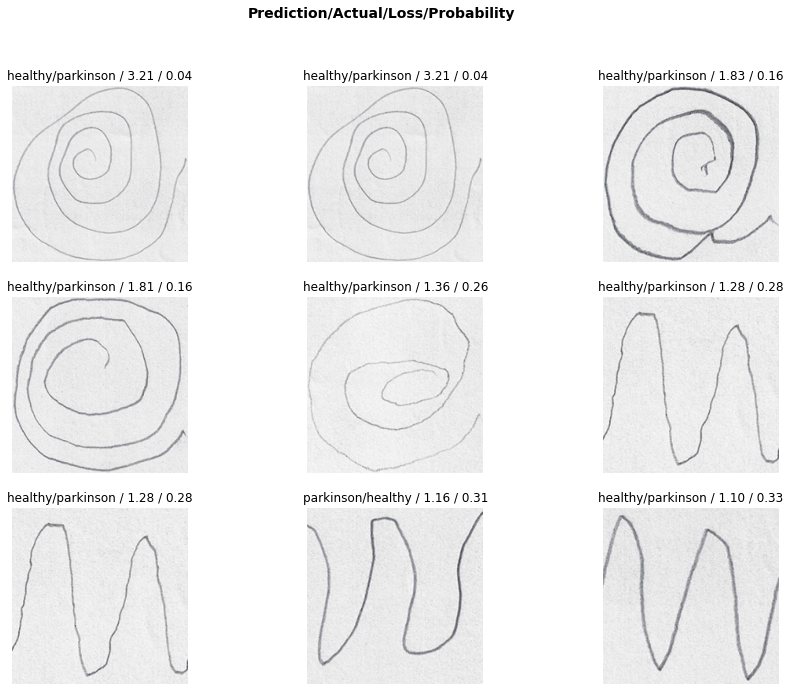

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11))

In [20]:
interp.most_confused()

[('parkinson', 'healthy', 12), ('healthy', 'parkinson', 4)]

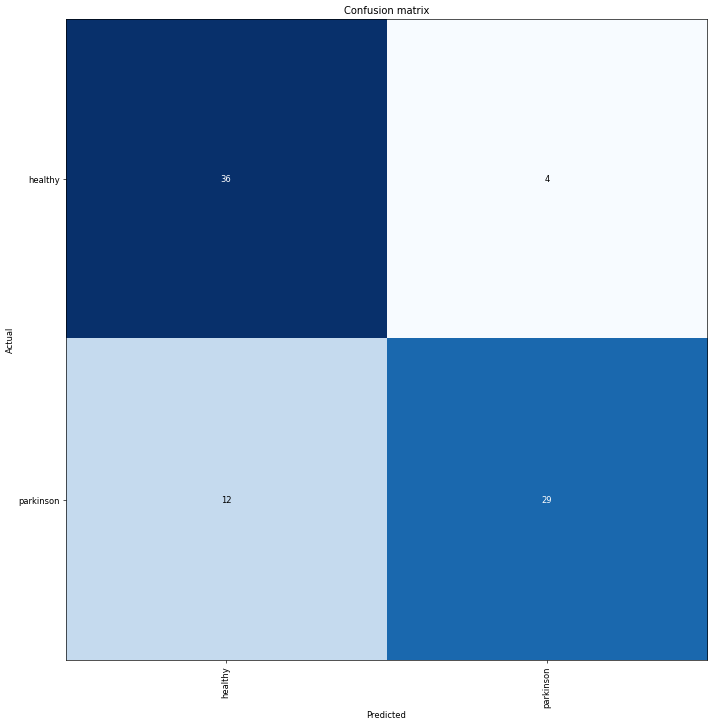

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
learn5 = cnn_learner(data, models.alexnet, metrics=accuracy, model_dir='/tmp/models')

In [23]:
# lets fit only our top layers to see how well she does 
learn5.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.084358,0.636250,0.716049,00:05


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.98E-03


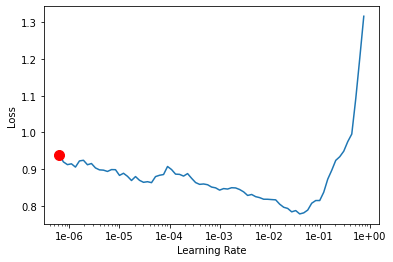

In [24]:
# Lets optimize
learn5.lr_find()
learn5.recorder.plot(suggestion=True)

In [25]:
learn5.fit_one_cycle(2, max_lr=slice(1e-2,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.924893,0.552824,0.728395,00:04
1,0.884954,0.546784,0.753086,00:04


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [26]:
# lets now unfreeze the rest to see if we can improve
learn5.unfreeze()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 3.02E-04


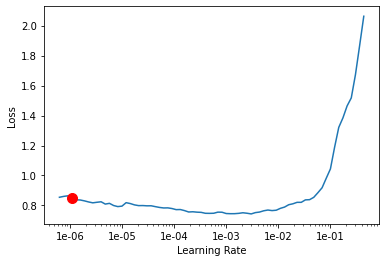

In [27]:
# Lets optimize
learn5.lr_find()
learn5.recorder.plot(suggestion=True)

In [28]:
# now lets fitting with a suggested lr instead of default
learn5.fit_one_cycle(20, max_lr=slice(1e-3,1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.967977,0.548541,0.740741,00:05
1,0.907254,0.546505,0.777778,00:05
2,0.858839,0.899077,0.629630,00:05
3,0.839276,0.563665,0.728395,00:05
4,0.832903,0.720149,0.679012,00:05
5,0.814375,0.494031,0.777778,00:05
6,0.869186,0.844405,0.604938,00:05
7,0.936884,4.339925,0.506173,00:05
8,0.982525,1.897465,0.518519,00:05
9,0.982642,1.759087,0.530864,00:05


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [29]:
interp50 = ClassificationInterpretation.from_learner(learn5)

In [30]:
interp50.most_confused()

[('parkinson', 'healthy', 17), ('healthy', 'parkinson', 7)]

In [31]:
learn5.save('stage-1-93')

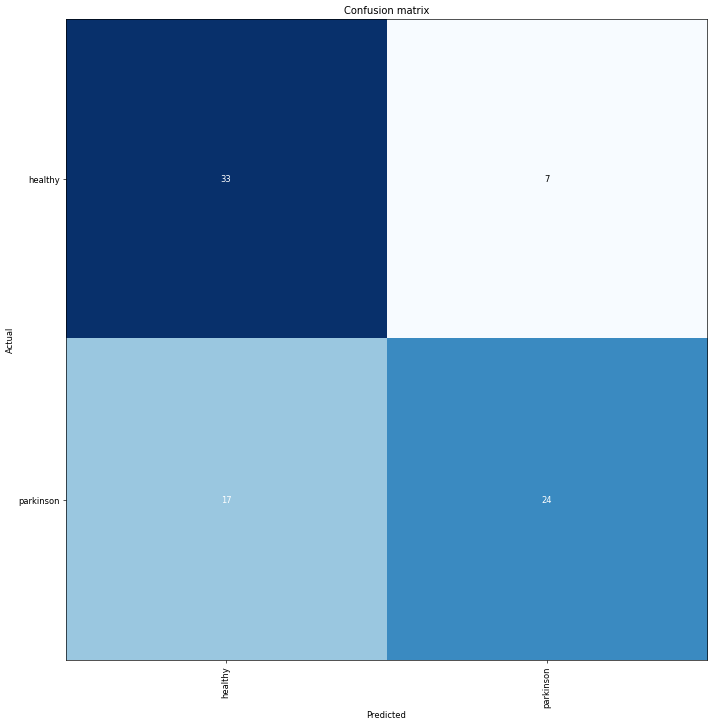

In [32]:
interp50.plot_confusion_matrix(figsize=(12,12), dpi=60)